## Basic Checks

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from autoviz.AutoViz_Class import AutoViz_Class

%matplotlib inline

Imported v0.1.806. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [2]:
pd.set_option('display.max_columns',None)

In [9]:
df = pd.read_excel('data/raw/INX_Future_Inc_Employee_Performance_CDS_Project2_Data.xls')

In [10]:
df

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000  32     Male          Marketing       Single     
1     E1001006  47     Male          Marketing       Single     
2     E1001007  40     Male      Life Sciences      Married     
3     E1001009  41     Male    Human Resources     Divorced     
4     E1001010  60     Male          Marketing       Single     
...        ...  ...     ...                 ...           ...   
1195   E100992  27   Female            Medical     Divorced     
1196   E100993  37     Male      Life Sciences       Single     
1197   E100994  50     Male            Medical      Married     
1198   E100995  34   Female            Medical       Single     
1199   E100998  24   Female      Life Sciences       Single     

      EmpDepartment       EmpJobRole    BusinessTravelFrequency  \
0               Sales   Sales Executive         Travel_Rarely     
1               Sales   Sales Executive         Travel_Rarely     
2               Sales   Sales Executive     Travel_Frequently     
3     Human Resources           Manager         Travel_Rarely     
4               Sales   Sales Executive         Travel_Rarely     
...               ...               ...                     ...   
1195            Sales   Sales Executive     Travel_Frequently     
1196      Development  Senior Developer         Travel_Rarely     
1197      Development  Senior Developer         Travel_Rarely     
1198     Data Science    Data Scientist         Travel_Rarely     
1199            Sales   Sales Executive         Travel_Rarely     

      DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0            10                 3                       4               
1            14                 4                       4               
2             5                 4                       4               
3            10                 4                       2               
4            16                 4                       1               
...                ...                ...                         ...   
1195          3                 1                       4               
1196         10                 2                       4               
1197         28                 1                       4               
1198          9                 3                       4               
1199          3                 2                       1               

      EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0          55                3               2                4           
1          42                3               2                1           
2          48                2               3                1           
3          73                2               5                4           
4          84                3               2                1           
...             ...                ...          ...                 ...   
1195       71                4               2                4           
1196       80                4               1                4           
1197       74                4               1                3           
1198       46                2               3                2           
1199       65                3               2                3           

      NumCompaniesWorked OverTime  EmpLastSalaryHikePercent  \
0              1             No               12              
1              2             No               12              
2              5            Yes               21              
3              3             No               15              
4              8             No               14              
...                  ...      ...                       ...   
1195           1            Yes               20              
1196           3             No               17              
1197           1            Yes               11              
1198       

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [6]:
df.describe().T.style.bar(subset=['mean'],color='#6ab29e')\
.background_gradient(subset=['std'],cmap='Pastel2_r')\
.background_gradient(subset=['50%'],cmap='Set3')

Completed Basic checks

## Exploratory Data analysis

In [7]:
categorical_data = df.select_dtypes(include='O').columns
numerical_data = df.select_dtypes(exclude='O').columns

In [8]:
print(f'Number of categorical features: {len(categorical_data)}\nNumber of numerical features: {len(numerical_data)}')

Number of categorical features: 9
Number of numerical features: 19


### Univariate Data Analysis

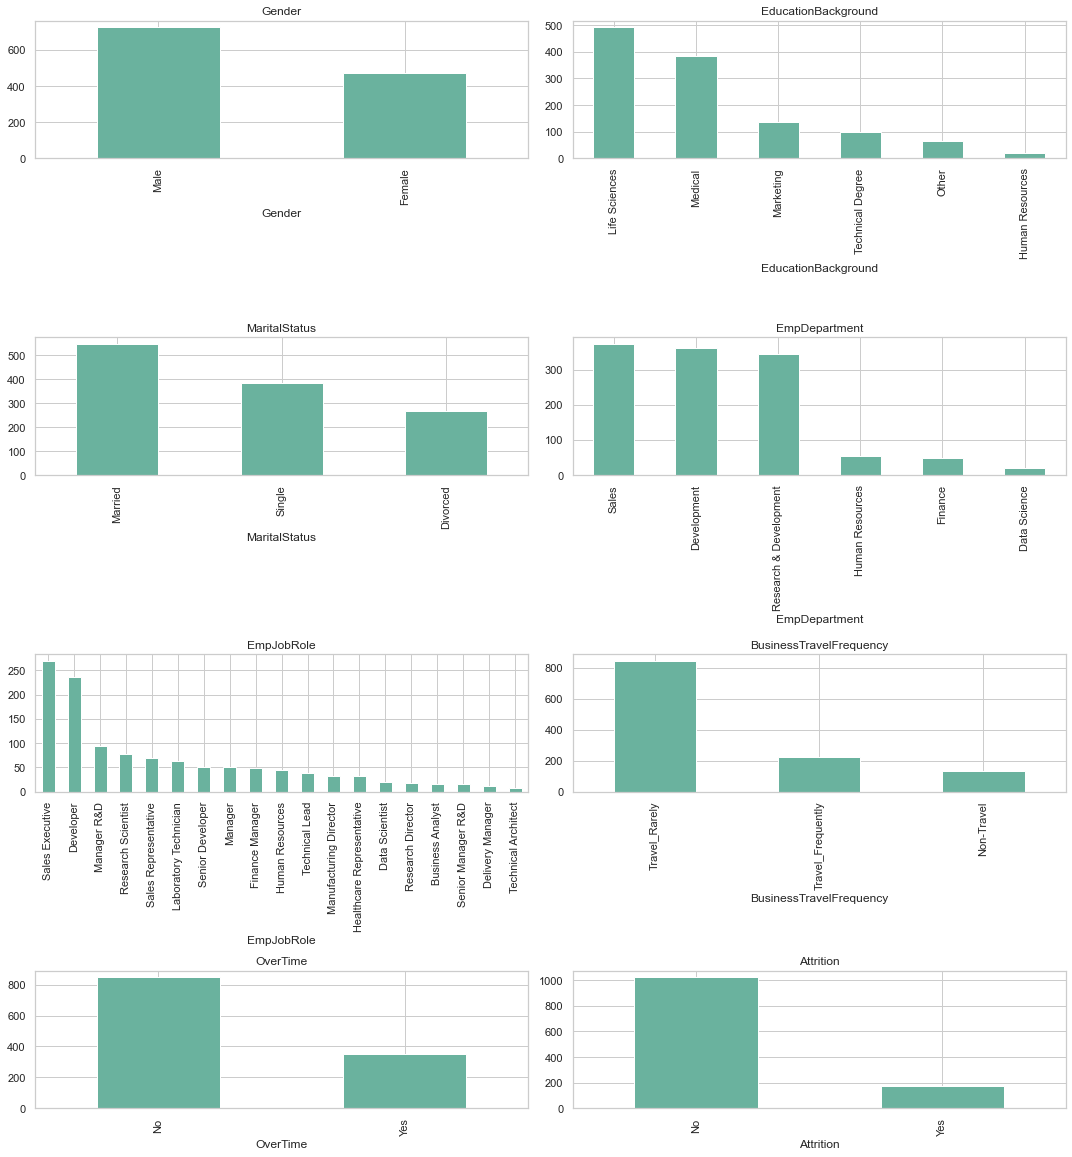

In [9]:
# Countplot for each categorical variable
plt.figure(figsize=(15,20))
pltnum = 1

for col in categorical_data:
    if (pltnum<= 20) & (col != 'EmpNumber'):       
        ax = plt.subplot(5,2,pltnum)
        df[col].value_counts().plot(kind='bar',color='#6ab29e')
        plt.title(col)
        pltnum += 1

plt.tight_layout()
plt.show()


#### Insights

- Count of `Male` employees are more than female employees
- More employees are from the `Life science` background followed by `medical` and `marketing`
- Married employees are more than the rest of the categories.
- Majority of people work in `Sales` department followed by `Development` and `Research and Development`
- Two popular roles are `Sales Executive` and `Developer`
- Majority of the roles requires the employees to `travel rarely`
- Number of employees working overtime is less
- Chances of Attrition is low too.

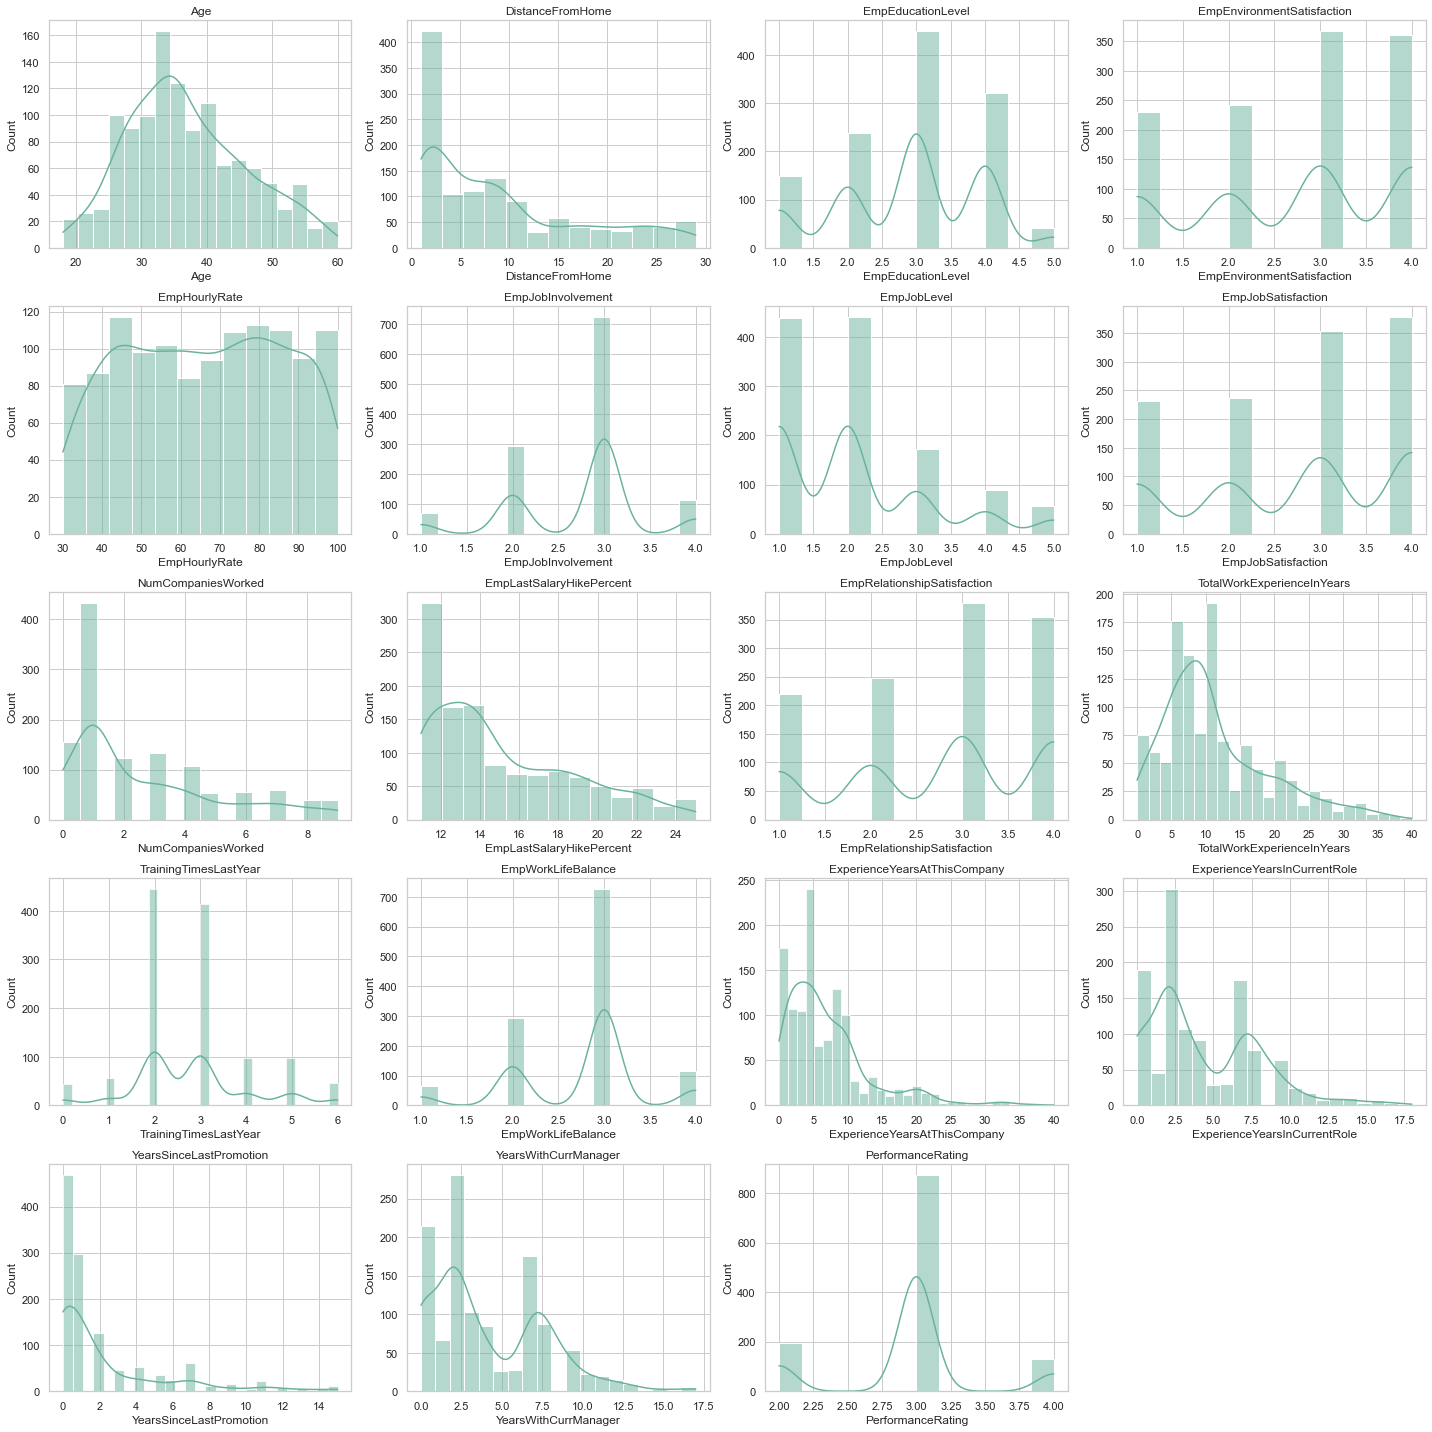

In [10]:
#  histogram for each numerical variable
plt.figure(figsize=(20,20))
pltnum = 1
for col in numerical_data:
    if pltnum <= 20:
        ax = plt.subplot(5,4,pltnum)
        sns.histplot(df[col],color='#6ab29e',kde=True)
        plt.title(col)
        pltnum += 1
        
plt.tight_layout()
plt.show()

#### Insights

* Most of the employees belong to the age group of 25-50. Data is almost a bell curve with `slight right skewness`.
* Employees tend to live closer to the company as the distancefromhome feature have more values in the range of 2-15
* Number of employees whose education `level 3` are higher followed by level 4, then level 2
* Almost double the employees are highly satistified with the company environment
* The hourly rate is almost evenly distributed between 30-100
* Employement job involvement has values among that the highest count is `3`
* More numbers of employees are in the `first` or `second` job level
* Majority of employees are satistified with their job and have given `3` and `4` are ratings
* Number of companies which the employees have worked is 1 (it is the highest count)
* Employee last salary hike percentage is `right skewed` and most hike percentage is between `12 and 14`
* Employee Relationship satisfaction is highly satisfactory as the highest count for the ratings are `3` followed by `4`.
* Total work experience in years is rightly skewed indicating that the employees have most experience between `0-12` indicating they are at the early career phase.
* Employees have mostly received `2 followed by 3 training` in a year.
* Employee work life balance is given as `3` indicating most of the employees are satisfied with the work life balance.
* Most employees are entry-associate level at the current company as the data is `rightly skewed` and in between `0-10 years` experience.
* Experience in the current role is also rightly skewed with most data between 0 -8 years.
* Most of the employees have received promotion, since the years since last promotion feature has most value between 0-1 years and data is rightly skewed.
* Most employees have spend 2.5 years with their current manager and there is small spike at 7.5 years too.

<Axes: xlabel='PerformanceRating', ylabel='count'>

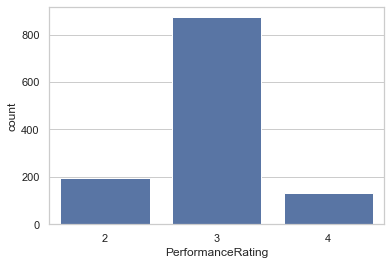

In [11]:
sns.countplot(x=df['PerformanceRating'],data=df)

#### Insights

* Data is `imbalanced` as the classes are unevenly distributed

### Bivariate data analysis

Shape of your Data Set loaded: (1200, 28)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  18
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    27 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['EmpNumber']

################ Multi_Classification problem ######

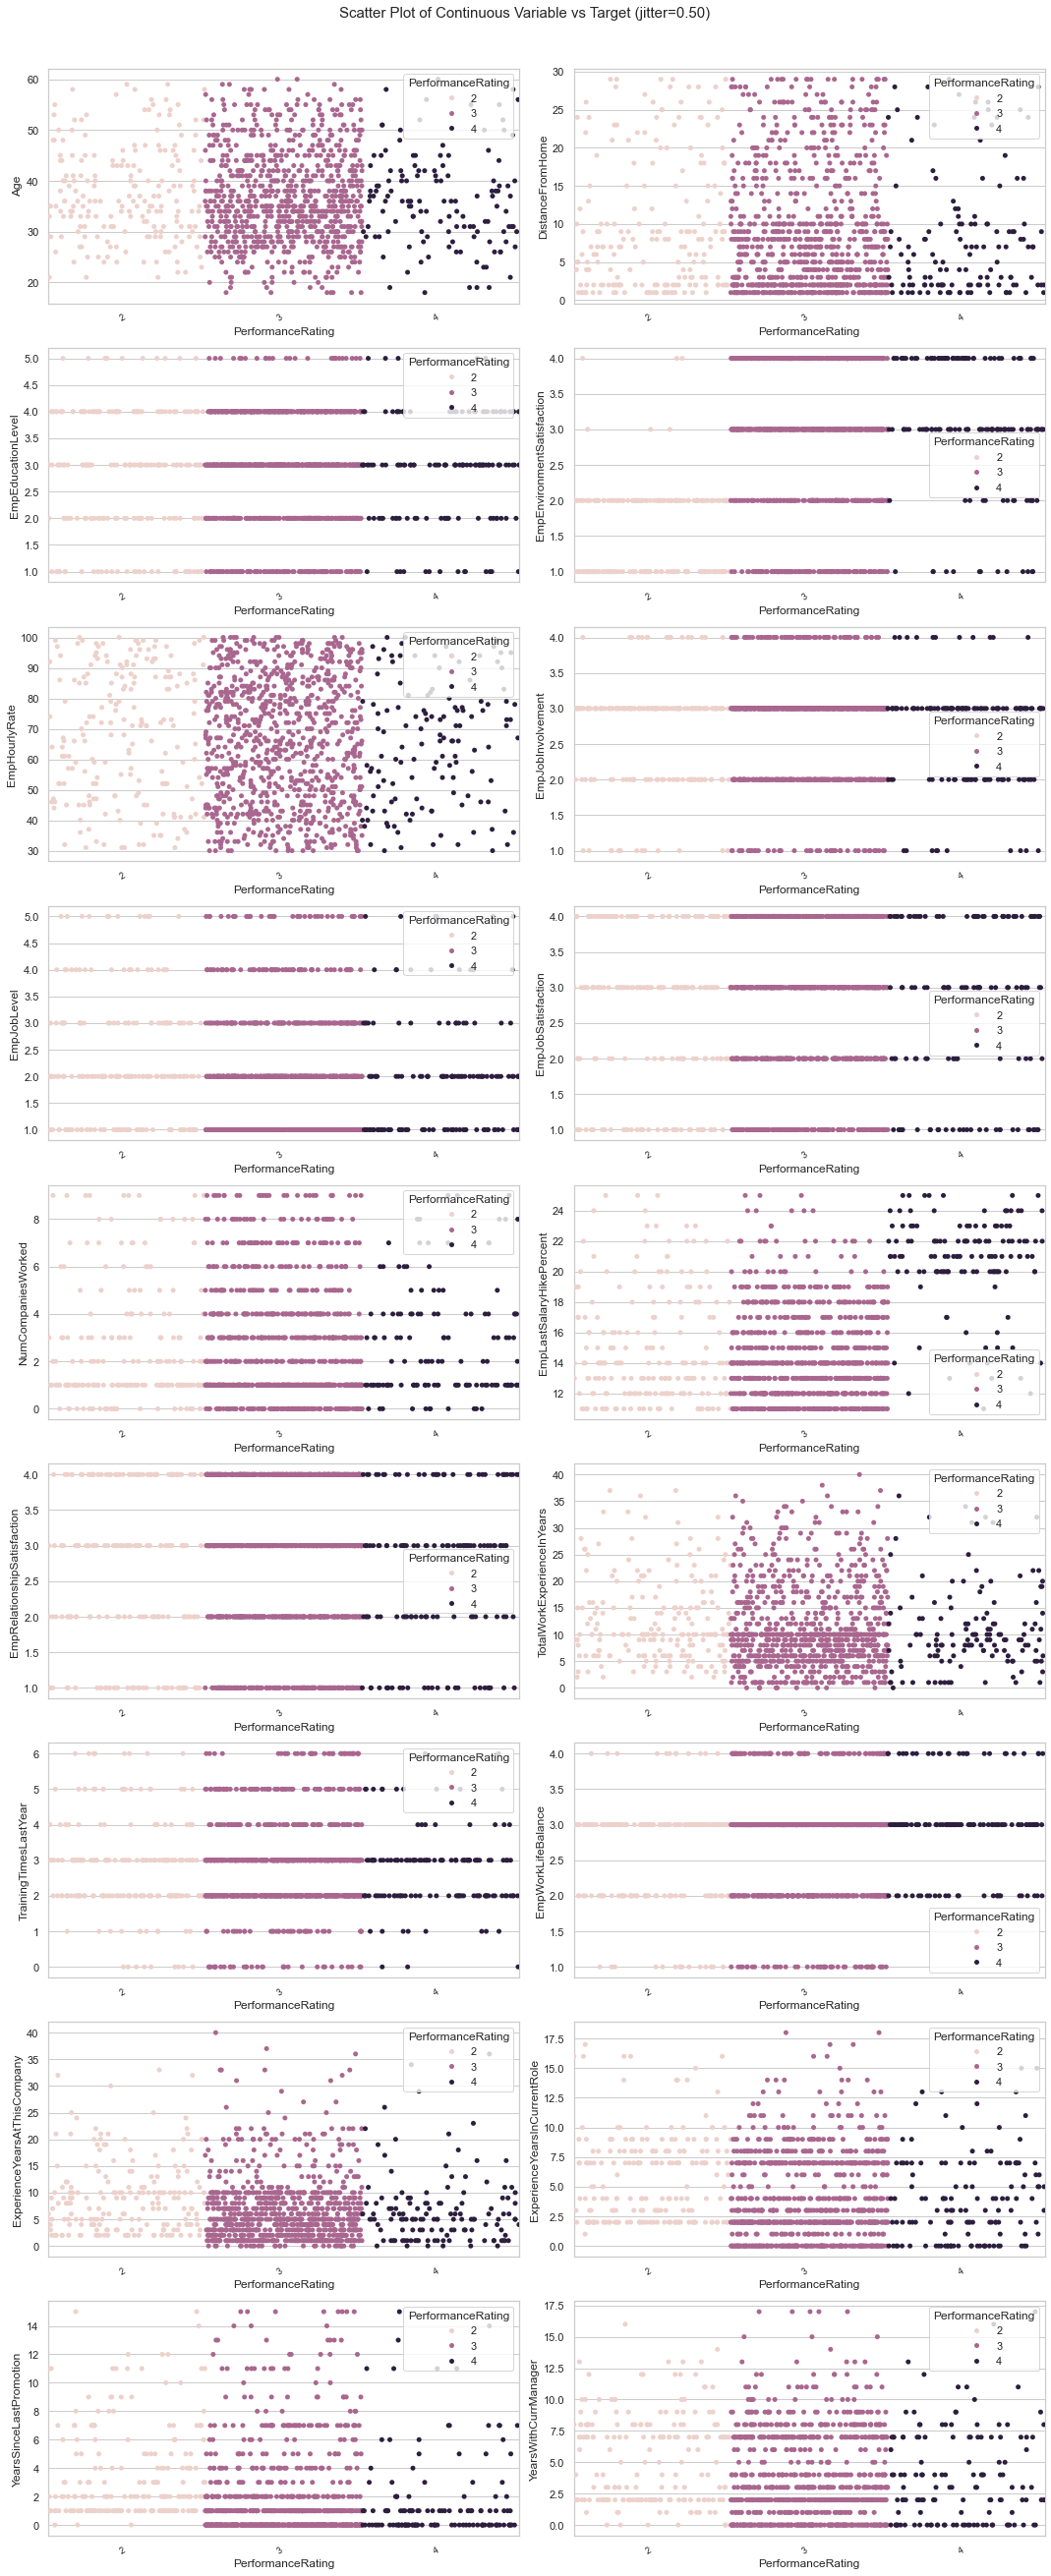

Total Number of Scatter Plots = 171


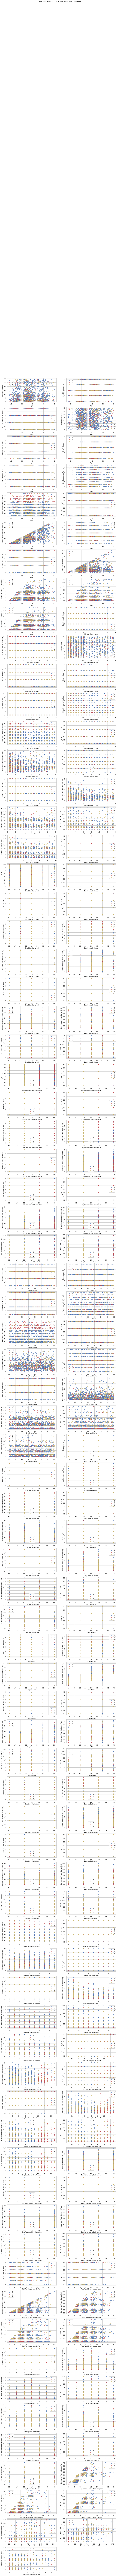

Could not draw some Distribution Plots


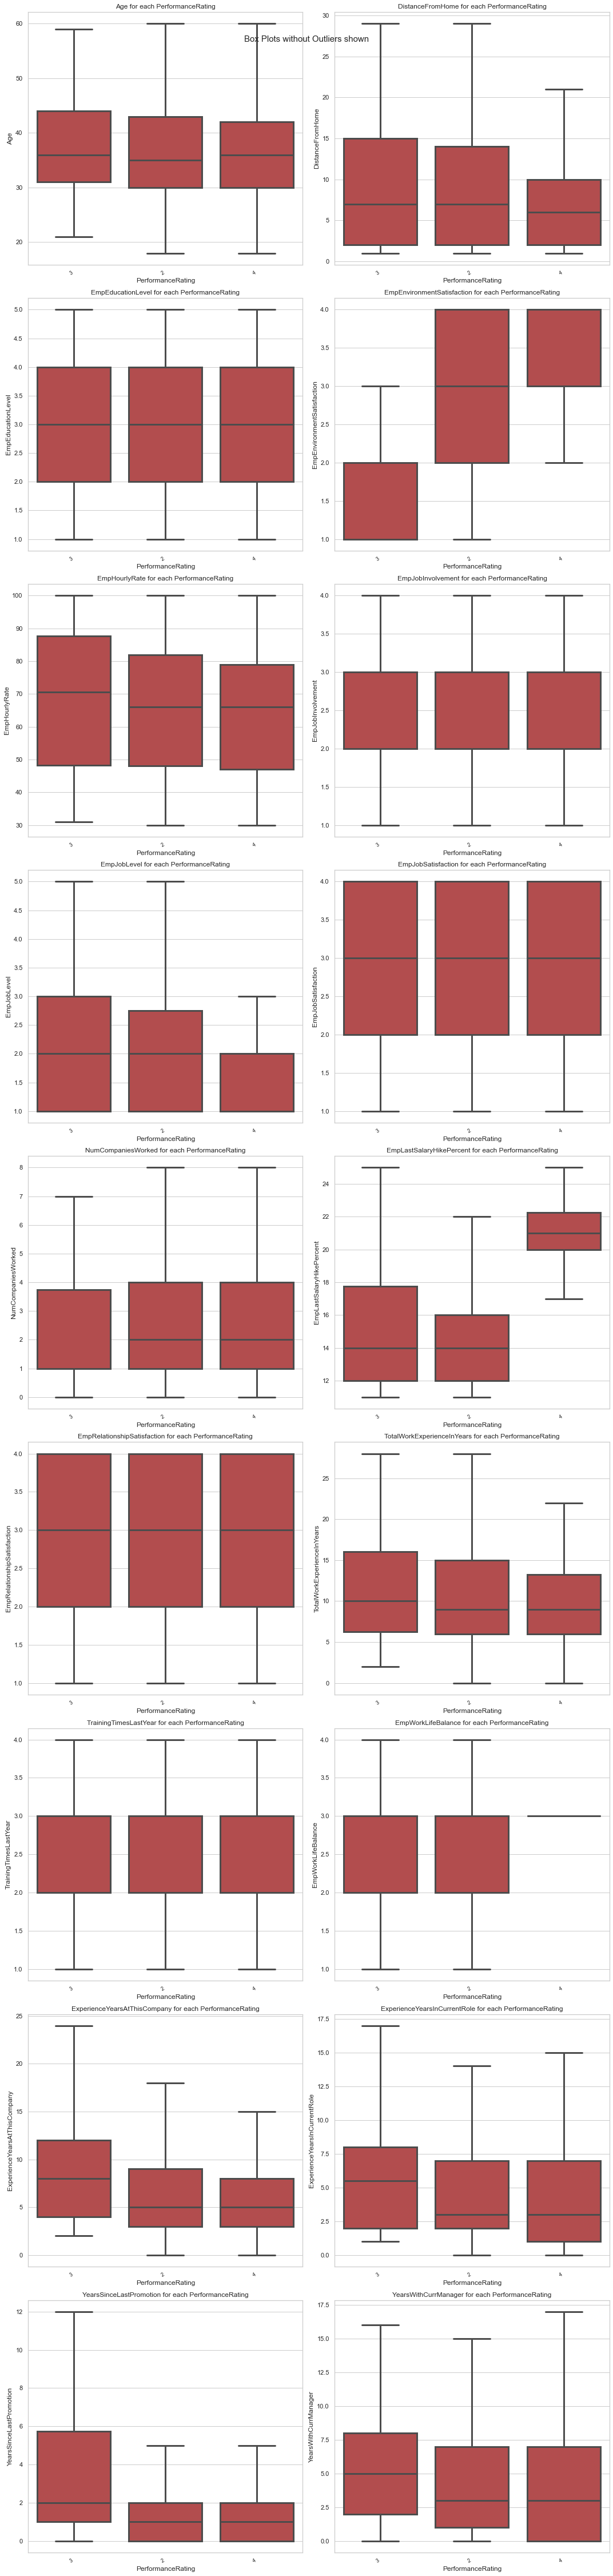

Could not draw some Heat Maps


<Figure size 1440x1440 with 0 Axes>

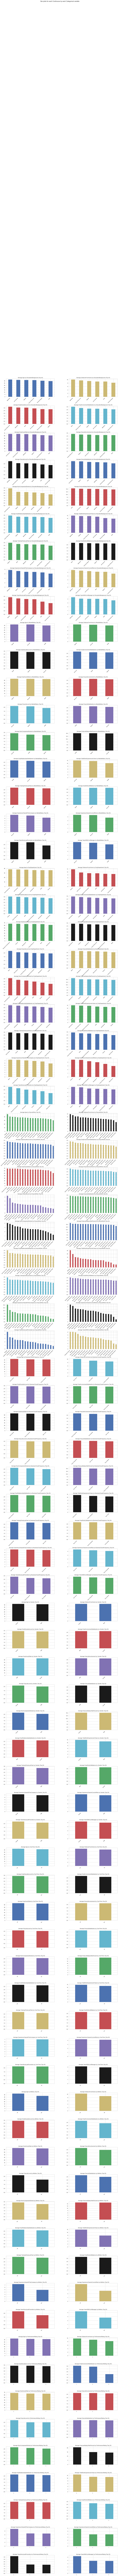

All Plots done
Time to run AutoViz = 117 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [12]:
av = AutoViz_Class()

dfte = av.AutoViz(filename='D:\\IABAC project\\Project\\data\\raw\\INX_Future_Inc_Employee_Performance_CDS_Project2_Data.xls'
                  , sep='', depVar = 'PerformanceRating', 
                  dfte = None, header = 0, verbose = 1, lowess = False, 
                  chart_format = 'svg', max_rows_analyzed = 150000, 
                  max_cols_analyzed = 30, save_plot_dir = None)

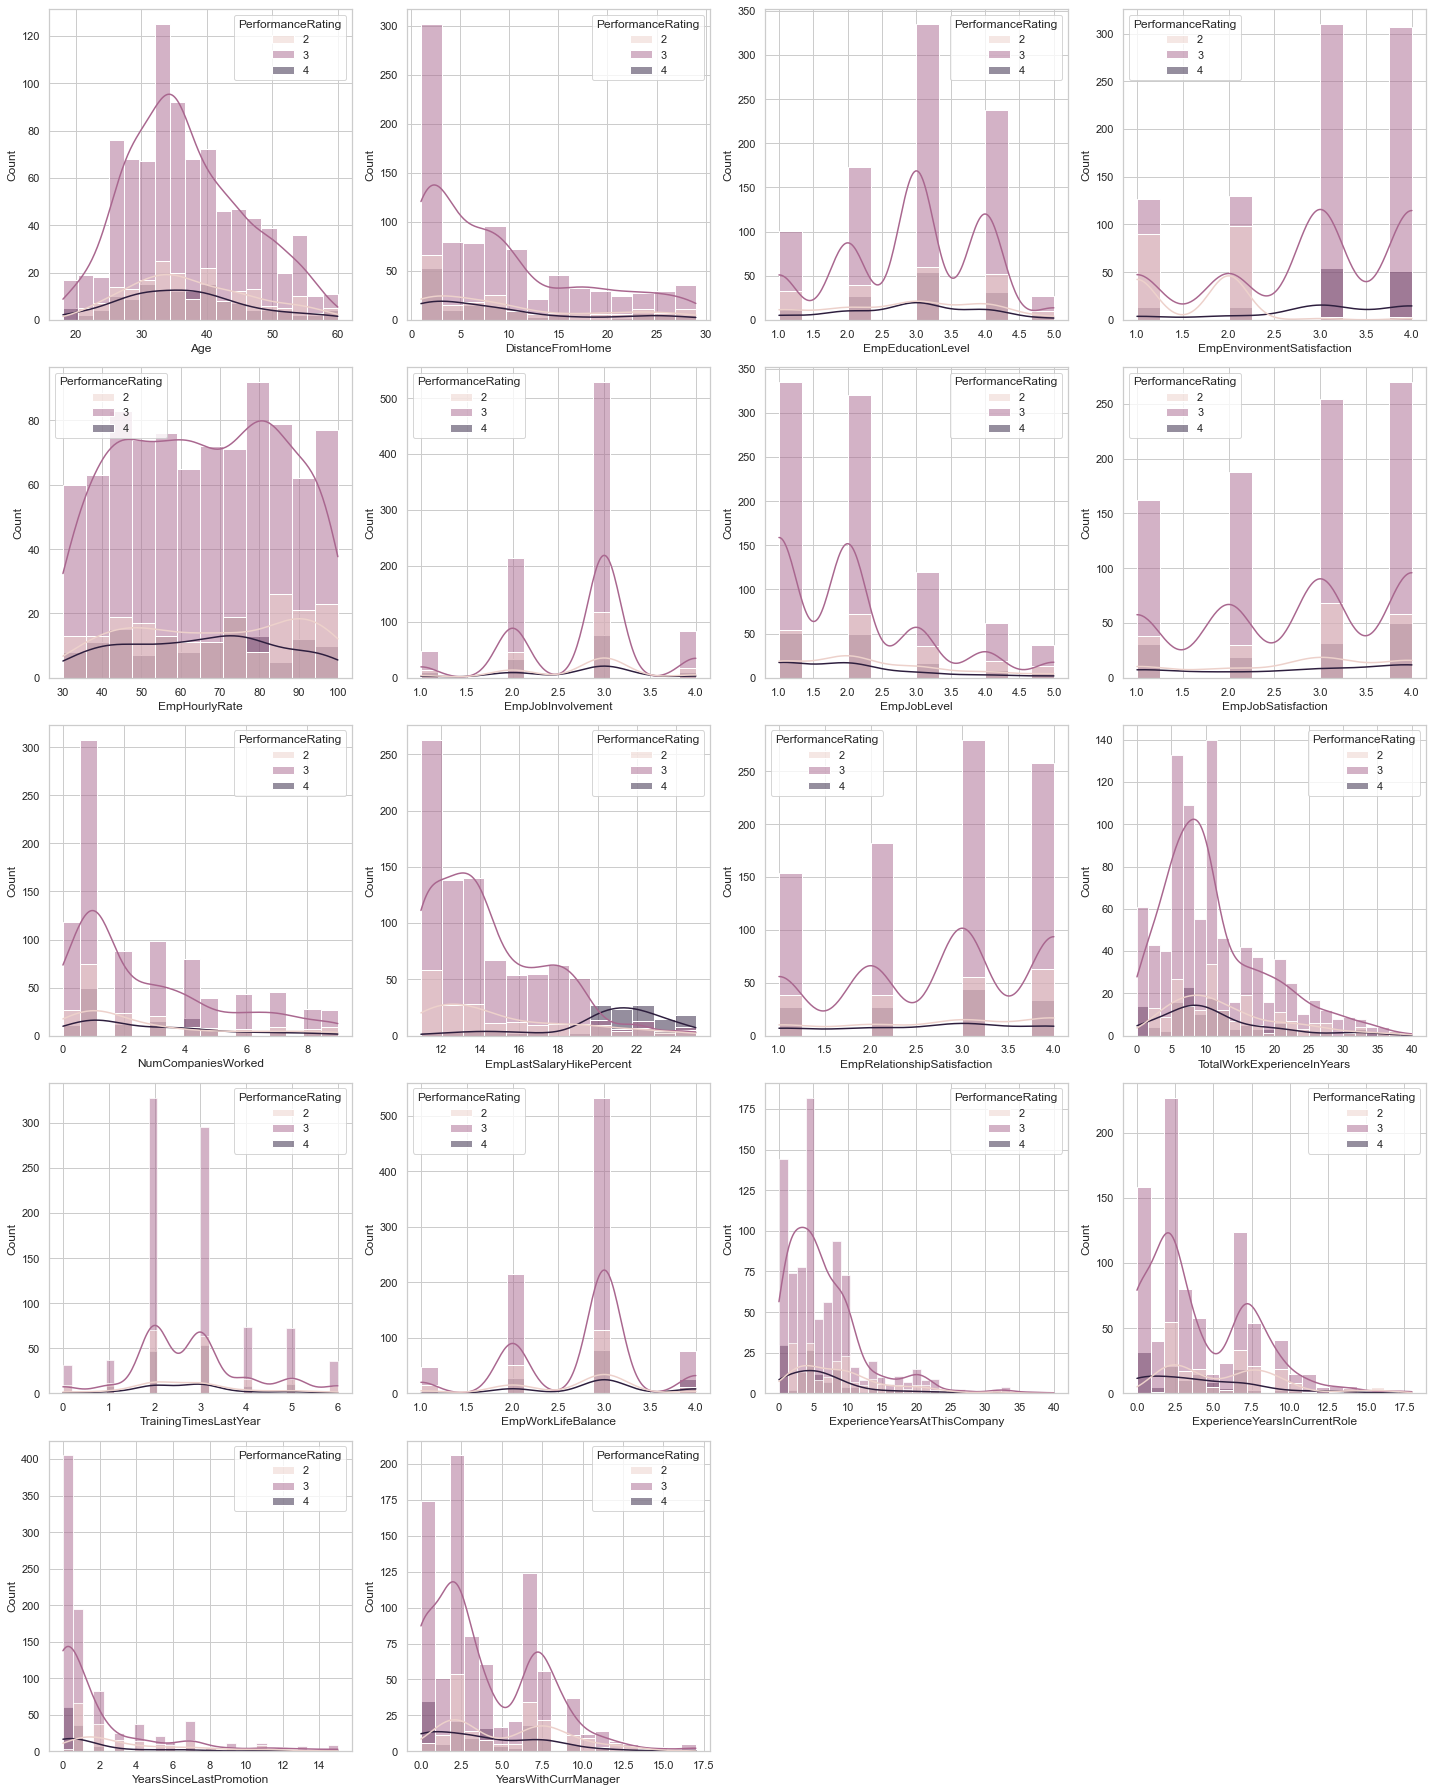

In [17]:
plt.figure(figsize=(20, 25))
pltnum = 1

for col in numerical_data:
    if pltnum <= 18: 
        ax = plt.subplot(5, 4, pltnum)
        sns.histplot(data=df, x=col, hue='PerformanceRating', kde=True)
        plt.xlabel(col)
        pltnum += 1

plt.tight_layout()
plt.show()


#### Insights:

The graph clearly shows the performance on an average is 3 on every feature

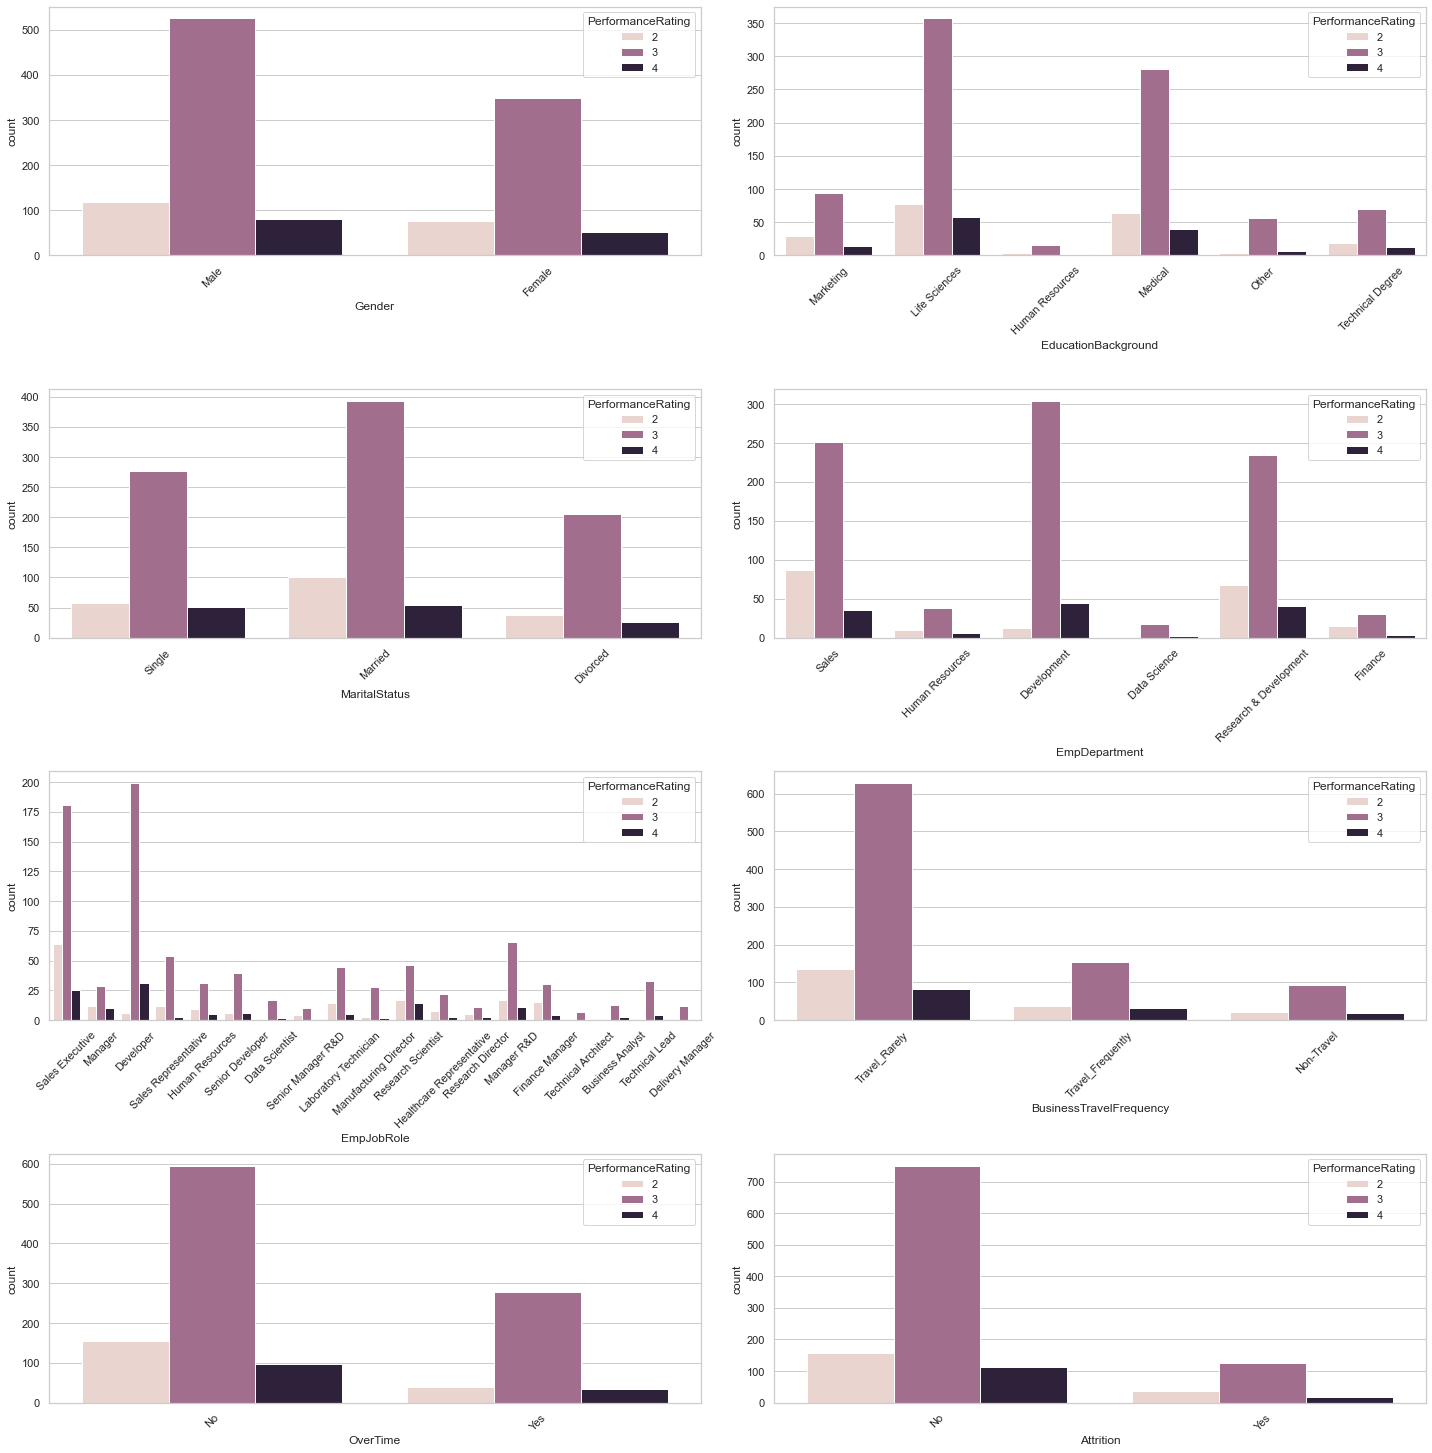

In [14]:
plt.figure(figsize=(20, 25))
pltnum = 1

for col in categorical_data:
    if (pltnum <= 10) & (col != 'EmpNumber'):  # Adjust based on the number of numerical columns
        ax = plt.subplot(5, 2, pltnum)
        sns.countplot(data=df, x=col, hue='PerformanceRating')
        plt.xlabel(col)
        plt.xticks(rotation=45)
        pltnum += 1

plt.tight_layout()
plt.show()


#### Insights:

Here also, performace rating on an average is 3

<Axes: xlabel='EmpDepartment', ylabel='count'>

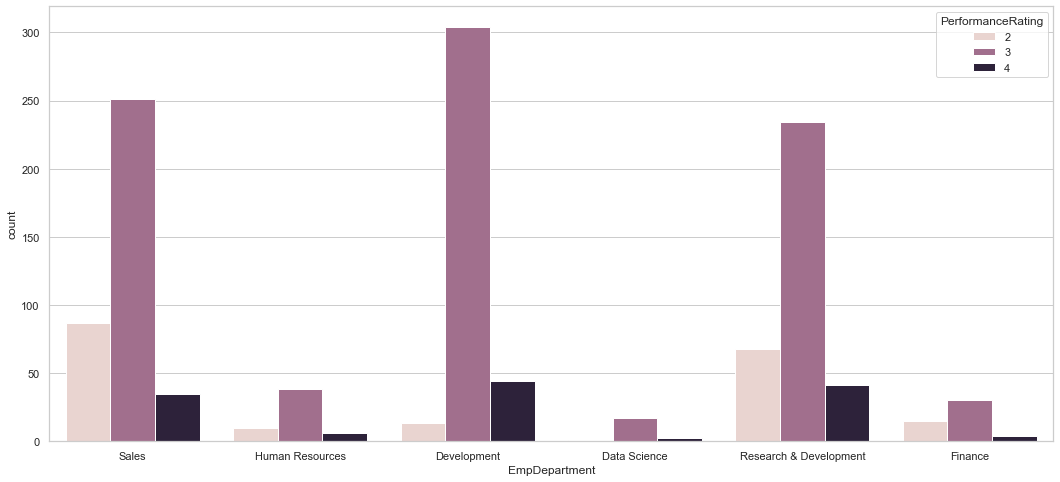

In [15]:
plt.figure(figsize=(18,8))
sns.countplot(hue=df['PerformanceRating'],x=df['EmpDepartment'])

Highest performing department is `Development` 

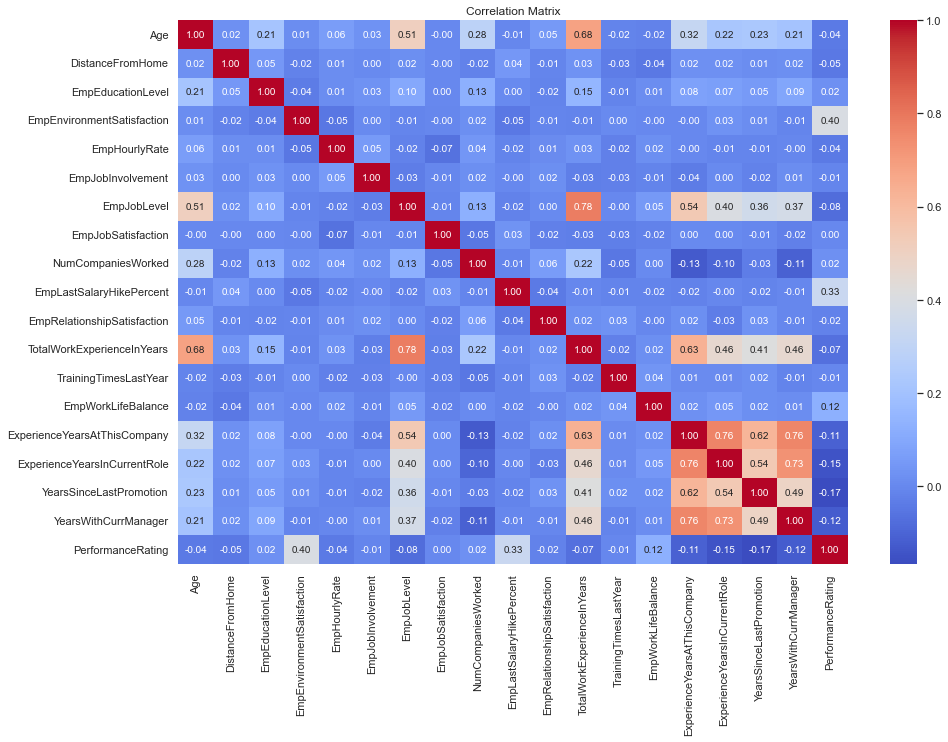

In [16]:
correlation_matrix = df.corr(numeric_only=True)

# Visualizing the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()